In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pwd

'/home/adnan/Downloads/majorproject/Heart-Disease-Detection-System'

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
#splitting data into input and target
input,target=df.loc[:,:'thal'],df['target']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(input,target,random_state=42,test_size=0.3,shuffle=True)

In [6]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled  = ss.transform(x_test)

# finding best value of k using hit and trial method

In [7]:
from sklearn.metrics import accuracy_score
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled,y_train)
    prediction_knn=knn.predict(x_test_scaled)
    scores[k] =accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

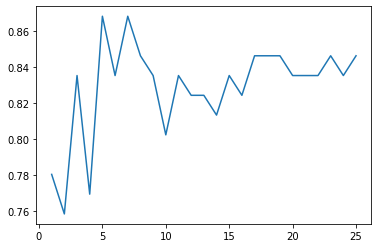

In [8]:
plt.plot(k_range,scores_list)

# got 0.86 accuracy at k=5

In [9]:

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
prediction_knn = knn.predict(x_test_scaled)
accuracy_knn= accuracy_score(y_test,prediction_knn)*100

In [11]:
accuracy_knn

86.81318681318682

In [12]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
print(confusion_matrix(y_test,prediction_knn ))

[[35  6]
 [ 6 44]]


In [13]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



# Now checking for custom data

In [14]:
custom_data_knn=np.array([[26,1,0,120,120,0,62,0,0,1,2,3,1]])
custom_data_knn_scaled = ss.transform(custom_data_knn)

In [15]:
custom_data_prediction_knn=knn.predict(custom_data_knn_scaled)

In [16]:
custom_data_prediction_knn

array([0])

In [17]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf=StratifiedKFold(n_splits=10,random_state=43) 
skf.get_n_splits(input,target)
x=input
y=target
for train_index,test_index in skf.split(input,target):
    x1_train,x1_test=x.iloc[train_index],x.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    knn.fit(x1_train,y1_train)
    prediction=knn.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
print("min score is ",min(accuracy))
print("max score is ",max(accuracy))
print("average score is ",np.mean(accuracy))


min score is  0.5
max score is  0.8333333333333334
average score is  0.6537300704486466
